Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.


**Мягкий дедлайн:** 6 ноября 23:59

**Жесткий дедлайн:** 13 ноября 23:59

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [0]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [0]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [0]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [0]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [0]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [0]:
age_categories = [age_category(age) for age in data.Age]

In [0]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [0]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [0]:
# Ваш код здесь
data.groupby('Sex').count()[['Name']]

,Name
Sex,
female,314
male,577


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

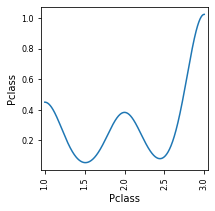

Распределение Pclass для мужчин:
Мужчин второго класса насчитывалось  108


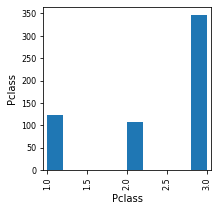

Распределение Pclass для женщин:


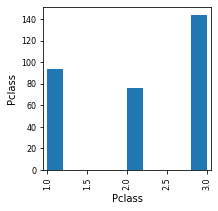

In [0]:
# Ваш код здесь
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(data[['Pclass']], figsize=(3, 3), diagonal='kde')
plt.show()

print('Распределение Pclass для мужчин:')
print('Мужчин второго класса насчитывалось ', data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]['Name'].count())
scatter_matrix(data[(data['Sex'] == 'male')][['Pclass']], figsize=(3, 3))
plt.show()

print('Распределение Pclass для женщин:')
scatter_matrix(data[(data['Sex'] == 'female')][['Pclass']], figsize=(3, 3))
plt.show()

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [0]:
# Ваш код здесь
print('Медиана: ', round(data['Fare'].median(), 2), '\nСтандартное отклонение: ', round(data['Fare'].std(), 2))


Медиана:  14.45 
Стандартное отклонение:  49.69


In [0]:
# Ниже - результат после удаления из фрейма строк (15) с нулевыми значениями стоимости билетов
#(получившихся значений нет в предложенных вариантах, поэтому в 7 задании не буду удалять такие строки)

data1 = data.drop(data[data['Fare'] == 0].index)
print('Медиана: ', round(data1['Fare'].median(), 2), '\nСтандартное отклонение: ', round(data1['Fare'].std(), 2))

Медиана:  14.5 
Стандартное отклонение:  49.94


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [0]:
# Ваш код здесь
Y = round(data[(data['Survived'] == 1) & (data['Age'] < 30)]['Name'].count() / data[(data['Age'] < 30)]['Name'].count() * 100, 1)
O = round(data[(data['Survived'] == 1) & (data['Age'] > 60)]['Name'].count() / data[(data['Age'] > 60)]['Name'].count() * 100, 1)
if Y > O:
  print('Да, люди моложе 30 выживали чаще:')
else:
  print('Нет')

print('{}% среди молодых и {}% среди старых'.format(Y, O))

Да, люди моложе 30 выживали чаще:
40.6% среди молодых и 22.7% среди старых


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [0]:
# Ваш код здесь
W = round(data[(data['Survived'] == 1) & (data['Sex'] == 'female')]['Name'].count() / data[(data['Sex'] == 'female')]['Name'].count() * 100, 1)
M = round(data[(data['Survived'] == 1) & (data['Sex'] == 'male')]['Name'].count() / data[(data['Sex'] == 'male')]['Name'].count() * 100, 1)
if W > M:
  print('Да, женщины выживали чаще:')
else:
  print('Нет')

print('{}% среди мужчин и {}% среди женщин'.format(M, W))

Да, женщины выживали чаще:
18.9% среди мужчин и 74.2% среди женщин


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [0]:
# Ваш код здесь
def FirstName_man(Name):
  FirstName = Name.split('.')[1].lstrip().split(' ')[0]
  return(FirstName)

data.loc[data['Sex'] == 'male', 'FirstName'] = data['Name'].apply(FirstName_man)
g = data.groupby('FirstName')['Name'].count()
g[g == g.max()]


FirstName
William    35
Name: Name, dtype: int64

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

Да, средний возраст погибших выше
Распределение стоимости билетов и возраста у погибших:


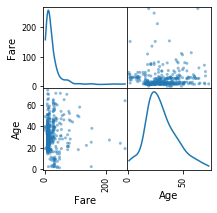

Распределение стоимости билетов и возраста у выживших:


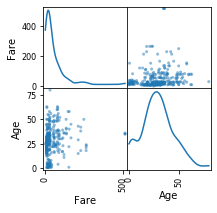

In [0]:
# Ваш код здесь
D = data[data['Survived'] == 1]['Age'].mean()
L = data[data['Survived'] == 0]['Age'].mean()
if L > D:
  print('Да, средний возраст погибших выше')
else:
  print('Нет')

print('Распределение стоимости билетов и возраста у погибших:')
scatter_matrix(data[data['Survived'] == 0][['Fare', 'Age']], figsize=(3, 3), diagonal='kde')
plt.show()

print('Распределение стоимости билетов и возраста у выживших:') 
scatter_matrix(data[data['Survived'] == 1][['Fare', 'Age']], figsize=(3, 3), diagonal='kde')
plt.show()

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [0]:
# Ваш код здесь

# Чем выше класс обслуживания (1 - самый высокий), тем выше средний возраст мужчин/женщин

# Если ничего не делать с NaN'ами в колонке Age, то верны все утверждения кроме второго

# Если NaN'ы в колонке Age заменить на среднее значение возраста в группе, к которой относится пассажир (подробнее - ниже), то
# будут верны только последние 2 утверждения (чтобы сравнить результаты - выполни код из ячейки ниже,
# который заполняет Nan'ы по возрастам, а потом запусти код из этой ячейки)

data.groupby(by = ['Pclass', 'Sex']).mean()[['Age']]


Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [0]:
# Заполняем NaN'ы в колонке Age

# Т.к. имеем много пропусков в колонке возраст, то вместо того чтобы исключать их из оценки
# запишем туда среднее значение для каждой группы возрастов, на группы будем делить в соответствии с титулом
# (например, Mrs - миссис, замужняя женщина, Miss - мисс, незамужняя девушка/девочка, Mr - мистер, мужчина женатый/неженатый и т.д.)
# это будет точнее, чем брать просто среднее значение по возрасту, т.к. большой разброс возрастов (дети до года и старики)

def Titul(Name):
  Titul = Name.split(',')[1].lstrip().split('.')[0]
  return(Titul)

data.loc[:, 'Titul'] = data['Name'].apply(Titul)

#data_age_wn = data.dropna(subset = ['Age'])
#g = data_age_wn.groupby('Titul').mean()['Age']    #Если удалять строки с NaN'ами и считать среднее по группе, то выходит так же как если бы их не удалять
g = data.groupby('Titul').mean()['Age']            #поэтому нигде в ДЗ не удаляла их перед тем как среднее считать (видимо Питон сам это делает)

def Age_fillna(Age, Titul):
  if np.isnan(Age):
    Age = g[Titul]
  return(Age)

data.at[:, 'Age'] = data.apply(lambda x: Age_fillna(x['Age'], x['Titul']), axis=1)

#for (i, sub_df) in g:  
#  sub_df['Age'].fillna(g[i], inplace = True)

#for index, row in data.iterrows():
#  if pd.isnull(row.Age):
#    data[row.Age] = g[row.Titul]

data


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titul
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,NaN,S,Miss
